In [20]:
import math
import torch
import matplotlib.pyplot as plt
from compute_loss_surface import get_loss_surface
import torch.nn as nn

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
fpath = "./loss-surfaces/"

In [23]:
use_cuda = torch.cuda.is_available()

In [24]:
model = Net()

In [25]:
fname = "saved_model.pt"
saved_model = torch.load(fpath + fname, map_location=('cpu'))
model.load_state_dict(saved_model)
if use_cuda:
    torch.cuda.set_device(3)
    model = model.cuda()

In [38]:
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/datasets/cifar10/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)
criterion = torch.nn.CrossEntropyLoss()

Files already downloaded and verified


In [27]:
fname = "high_loss.pt"
high_loss = torch.load(fpath + fname)

fname = "low_loss.pt"
low_loss = torch.load(fpath + fname)

In [33]:
fname = "neg_evals.pt"
neg_evals = torch.load(fpath + fname)
fname = "neg_evecs.pt"
neg_evecs = torch.load(fpath + fname)

In [34]:
fname = "pos_evals.pt"
pos_evals = torch.load(fpath + fname)

In [35]:
neg_evals

tensor([ 5.2549e+04,  4.6268e+04,  4.1060e+04,  2.4184e+04,  2.0703e+04,
         1.6055e+04,  1.3329e+04,  1.3027e+04,  1.0955e+04,  9.5359e+03,
         8.2335e+03,  7.9525e+03,  6.7679e+03,  6.5112e+03,  5.9049e+03,
         5.2641e+03,  4.9757e+03,  4.4330e+03,  4.2383e+03,  3.6239e+03,
         3.4732e+03,  3.1975e+03,  3.1119e+03,  2.6546e+03,  2.6043e+03,
         2.4557e+03,  2.0928e+03,  2.0722e+03,  1.8894e+03,  1.7404e+03,
         1.6326e+03,  1.4114e+03,  1.2955e+03,  1.1587e+03,  1.0263e+03,
         9.0970e+02,  7.4746e+02,  5.9600e+02,  4.8930e+02,  3.6868e+02,
         2.7499e+02,  1.7249e+02,  9.2562e+01,  2.2602e+01,  2.4219e-01,
        -5.9219e+01, -1.0304e+02, -1.4527e+02, -2.7619e+02, -3.4200e+02],
       device='cuda:0')

In [36]:
pos_evals

tensor([1.5669e+01, 8.3189e+01, 1.6606e+02, 2.7300e+02, 3.6276e+02, 4.8499e+02,
        6.1626e+02, 7.3375e+02, 8.6465e+02, 1.0251e+03, 1.1606e+03, 1.3416e+03,
        1.4765e+03, 1.5978e+03, 1.7051e+03, 1.8890e+03, 2.0721e+03, 2.0997e+03,
        2.4549e+03, 2.6038e+03, 2.6545e+03, 3.1121e+03, 3.1972e+03, 3.4725e+03,
        3.6229e+03, 4.2398e+03, 4.4334e+03, 4.9762e+03, 5.2613e+03, 5.9040e+03,
        6.5099e+03, 6.7693e+03, 7.9545e+03, 8.2326e+03, 9.5309e+03, 1.0953e+04,
        1.3028e+04, 1.3324e+04, 1.6054e+04, 2.0704e+04, 2.4188e+04, 4.1057e+04,
        4.6252e+04, 1.0304e+05], device='cuda:0')

In [39]:
new_neg_loss = get_loss_surface(neg_evecs[:, -5:].cuda(), model, trainloader,
                            criterion, rng=5., n_pts=5, use_cuda=True)

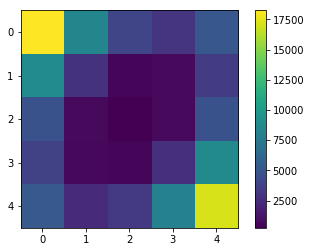

In [43]:
plt.imshow(new_neg_loss)
plt.colorbar()

In [49]:
new_small_loss = get_loss_surface(neg_evecs[:, -7:-5].cuda(), model, trainloader,
                            criterion, rng=5., n_pts=5, use_cuda=True)

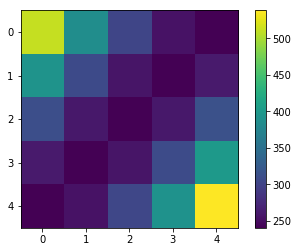

In [50]:
plt.imshow(new_small_loss)
plt.colorbar()

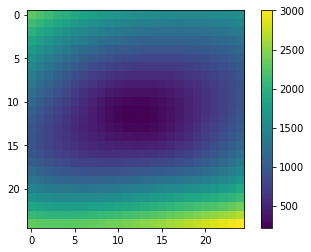

In [10]:
plt.imshow(high_loss)
plt.colorbar()

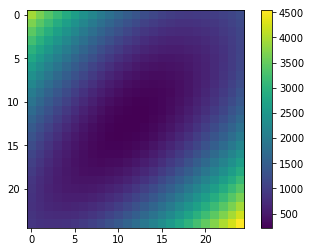

In [11]:
plt.imshow(low_loss)
plt.colorbar()

In [12]:
test = torch.zeros(5)
test[[1, 3]] = 1.


In [13]:
import numpy as np

In [23]:
fname = "neg_evecs.pt"
evecs = torch.load(fpath + fname)

keep = np.where(evecs[0, :].cpu() != 0.)

In [25]:
evecs[0, :]

tensor([0.0000, 0.0233, 0.0185, 0.0136, 0.0015], device='cuda:0')

In [21]:
evecs[:, 0]

tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0')

In [19]:
evecs[:, keep].squeeze()

tensor([], device='cuda:0', size=(62006, 0))